In [35]:
# built-in dependencies
import os
import time

# third-party dependencies
import numpy as np
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from voyager import Index, Space

In [17]:
model_name = 'Facenet'
detector_backend = 'mtcnn'
num_dimensions = 128 # Facenet produces 128-dimensional vectors 

### Find embeddings for facial database

In [10]:
img_names = []
embeddings = []

for dirpath, dirnames, filenames in os.walk('deepface/tests/dataset/'):
    for filename in filenames:
        if '.jpg' in filename:
            img_name = f'{dirpath}{filename}'
            
            embedding_objs = DeepFace.represent(
                img_name, model_name=model_name, detector_backend=detector_backend
            )
            embedding = embedding_objs[0]['embedding']
            
            embeddings.append(embedding)
            img_names.append(img_name)

In [12]:
print(f'There are {len(embeddings)} embeddings available')

There are 62 embeddings available


### Creating synthetic data

In [14]:
target_size = 1000000
for i in range(len(embeddings), target_size):
    embedding = np.random.uniform(-5, +5, num_dimensions)
    embeddings.append(embedding)
    img_names.append(f'synthetic_{i}.jpg')

In [15]:
embeddings_np = np.array(embeddings)

In [16]:
print(f'Database size is {embeddings_np.shape[0]}')

Database size is 1000000


### Storing embeddings into Voyager

In [18]:
index = Index(Space.Euclidean, num_dimensions=num_dimensions)

In [19]:
tic = time.time()

index.add_items(embeddings_np)

toc = time.time()

print(
    f'{embeddings_np.shape[0]} embeddings are stored in voyager in '
    f'{round(toc-tic, 2)} seconds'
)

1000000 embeddings are stored in voyager in 27.64 seconds


### Find a target image in voyager index

In [20]:
target_img = 'target.jpg'
embedding_obj = DeepFace.represent(
    target_img, model_name=model_name, detector_backend=detector_backend
)
target_embedding = embedding_obj[0]['embedding']

In [22]:
tic = time.time()

neighbors, distances = index.query(target_embedding, k=3)

toc = time.time()

print(
    f'Index search completed in {toc-tic} seconds among '
    f'{embeddings_np.shape[0]} vectors'
)

Index search completed in 0.0002269744873046875 seconds among 1000000 vectors


1. nearest neighbor is img5.jpg with distance 43


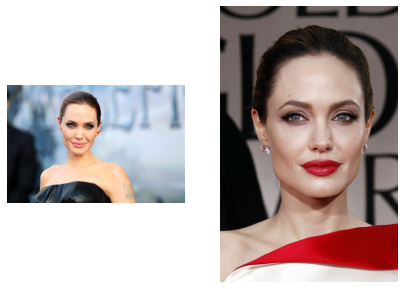

--------------------------------
2. nearest neighbor is img7.jpg with distance 48


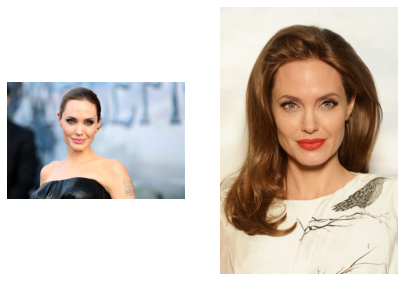

--------------------------------
3. nearest neighbor is img10.jpg with distance 50


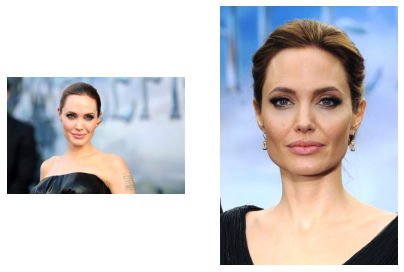

--------------------------------


In [42]:
target_img = cv2.imread('target.jpg')

for i, neighbor in enumerate(neighbors):
    img_name = img_names[neighbor]
    label = img_name.split('/')[-1]
    distance = distances[i]
    print(
        f'{i+1}. nearest neighbor is {label} with distance {round(distance)}'
    )
    
    fig = plt.figure(figsize=(7, 7))
    
    fig.add_subplot(1,2,1)
    plt.imshow(target_img[:,:,::-1])
    plt.axis('off')
    
    fig.add_subplot(1,2,2)
    img = cv2.imread(img_name)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')
    
    plt.show()
    
    
    print('--------------------------------')